# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

# Contenido <a id='back'></a>

* [1 Introducción](#intro)
* [2 Inicialización](#inic)
    * [2.1 Cargar Datos](#datos)
    * [2.2 Explorar datos iniciales](#explorar)
    * [2.3 Conclusiones y siguientes pasos](#conclusiones_1)
* [3 Transformación de datos](#transformacion)
* [4 Tratar los valores ausentes (si hay)](#tratar)   
    * [4.1 "is_4wd"](#is_4wd)
    * [4.2 "model_year"](#model_year)
    * [4.3 "cylinders"](#cylinders)
    * [4.4 "paint_color"](#paint_color)  
    * [4.5 "odometer"](#odometer) 
    * [4.6 Estado final valores ausentes](#final_state)     
* [5 Corregir los tipos de datos](#corregir)
* [6 Enriquecer datos](#enriquecer)
* [7 Comprobar datos limpios](#datos_limpios)    
* [8 Estudiar parámetros principales](#parametros_principales)
* [9 Estado final valores ausentes](#valores_ausentes) 
    * [9.1 "Price"](#ausentes_price)
    * [9.2 "Car_years"](#ausentes_years)
    * [9.3 "Odometer"](#ausentes_odometer)
    * [9.4 "Cylinders"](#ausentes_cylinder)  
    * [9.5 "Condition"](#ausentes_condition)      
* [10 Estudiar parámetros principales sin valores atípicos](#sin_atip)
    * [10.1 Comparación "Price"](#comp_price)
    * [10.2 Comparación "car_years"](#comp_years)
    * [10.3 Comparación "odometer"](#comp_odo)
    * [10.4 Comparación "cylinders" y "condition"](#comp_cyc)    
* [11 Periodo de colocación de los anuncios](#anuncios)    
* [12 Precio promedio por cada tipo de vehiculo](#price_type)
* [13 Factores de precio](#price)  
    * [13.1 Sedan](#sedan)
    * [13.2 SUV](#suv)
* [14 Conclusión general](#end)

## 1. Introducción

En el presente proyecto se procederá a analizar datos recopilados correspondientes a la venta de vehículos usados para poder determinar los factores que influyen en el precio de venta de estos. Se procederá a estudiar la base de datos, identificar si existen datos ausentes, problemas de formato o alguna otra clase de inconsistencia en esto y posteriormente se solucionarán los problemas existentes dentro de lo posible. 

 Continuaremos con un proceso de enriquecimiento de datos para facilitar el análisis final de los mismos y el mismo proceso de análisis exploratorio de la base de datos, identificando valores atípicos, estudiando el comportamiento de los datos con y sin la presencia de los mismos, se estudiarán los principales parámetros que podrían influir en el precio de los vehículos para finalmente llegar a una conclusión general sobre estos y el proyecto en general.

## 2. Inicialización

Se proceden a cargar las librerías necesarias para el proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2.1. Cargar datos

Se procede a cargar los datos

In [3]:
autos = pd.read_csv("datasets/vehicles_us.csv")

### 2.2. Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Se procede a mostrar la información general del DataFrame

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Se procede a imprimir una muestra de los datos para realizar una primera observación de los mismos

In [5]:
autos.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Observando la información general del Dataframe se pueden observar datos faltantes en 5 columnas, "model_year", "cylinders", "odometer", "paint_color" y "is_4wd", esto se puede corroborar al mirar las primeras 10 filas del Dataframe donde observamos datos faltantes en las columnas antes mencionadas, también se puede notar que los datos faltantes en la columna "is_4wd" llegan a alrededor del 50% de los datos. 

Por otra parte, podemos notar que el tipo de dato de la columna "date_posted" es una cadena cuando debería ser de tipo fecha, mientras que las columnas "model_year", "cylinders" y "is_4wd" por el tipo de número que deben presentar se transformarán a int64

### 2.3. Conclusiones y siguientes pasos

En una primera vista de los datos iniciales, podemos observar cómo se mencionó anteriormente la ausencia de datos en 5 columnas llamando fuertemente la atención la ausencia de alrededor de u 50% de los datos en "is_4wd", debido al alto porcentaje en esta columna se le podría atribuir principalmente esta ausencia a un error técnico que deberá ser evaluado con mayor profundidad a la hora de completar los datos.

Los próximos pasos correspondientes al pre procesamiento de los datos consistirán primero en una transformación de los datos buscando la existencia de anomalías de formato y duplicados dentro de los mismos, posteriormente se analizarán las columnas con datos ausentes y dependiendo de su relevancia en el análisis principal del proyecto, en una primera vista se considera de mayor relevancia la columna "model_year" y "odometer" con respecto al precio de venta de los vehículos, se procederá a tratar sus valores ausentes, para finalizar se procederá a realizar un cambio de formato en "date_posted" para facilitar posteriores trabajos que incluyan estos datos y a las columnas "model_year", "cylinders" y "is_4wd" a tipo int64 para mejorar la presentación de estas.

## 3. Transformación de datos

Se procederá a revisar columna a columna la existencia de valores categóricos duplicados o valores cuantitativos que no sean lógicamente correspondientes con la misma, por ejemplo valores negativos en el millaje. Posteriormente se revisará la existencia de filas duplicadas en el Dataframe y en caso de existir se concluirá que hacer con ellas.

In [6]:
autos["price"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Se pueden apreciar valores atípicos en la columna, por un lado, valor mínimo de 1 lo cual no tiene sentido con respecto a que corresponde al precio de venta de un vehículo y un valor máximo de 375000 el cual está muy por sobre el percentil 75 de los datos, lo anterior será analizado en su momento cuando se realice el estudio principal del proyecto, pero de momento no hay otras inconsistencias que necesiten abordarse

In [7]:
autos["model_year"].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

En general los datos se observan correctos, dejando de lado que el año del modelo más antiguo corresponde a 1908 pero esto es factible al poder tratarse de un vehículo muy antiguo

In [8]:
autos["model"].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [9]:
len(autos["model"].unique())

100

Se pueden aprecias modelos de autos escritos de diversas formas pero que hacen referencia a un mismo modelo, estos son ford f-150 y ford f150, ford f-250 y ford f250, ford f-350 sd y ford f350 super duty, ford f-250 sd, ford f250 super duty y ford f-250 super duty. Se procederá a definir una función para reemplazar los duplicados implícitos

In [10]:
def replace_wrong_values(wrong_values, correct_value, data, column):
    for wrong_value in wrong_values: 
        data[column] = data[column].replace(wrong_value, correct_value)

In [11]:
lista = ["ford f150"]
replace_wrong_values(lista, "ford f-150", autos, "model")

In [12]:
lista = ["ford f250"]
replace_wrong_values(lista, "ford f-250", autos, "model")

In [13]:
lista = ["ford f350 super duty"]
replace_wrong_values(lista, "ford f-350 sd", autos, "model")

In [14]:
lista = ["ford f250 super duty","ford f-250 super duty"]
replace_wrong_values(lista, "ford f-250 sd", autos, "model")

In [15]:
len(autos["model"].unique())

95

Podemos observar que los duplicados implícitos han sido reemplazados disminuyendo la cantidad de modelos de 100 a 95

In [16]:
autos["condition"].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

No se observan problemas

In [17]:
autos["cylinders"].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

No se observan problemas obviando el valor ausente antes mencionado y el cambio de tipo

In [18]:
autos["fuel"].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

No se observan problemas

In [19]:
autos["odometer"].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

En general los datos se observan correctos, lo único que llama la atención es la presencia de vehículos usados con millaje de 0, esto es factible, pero habrá que revisarlo en su momento observando el año del modelo de vehículo que poseen esta característica para decidir si son datos anómalos.

In [20]:
autos["transmission"].unique()

array(['automatic', 'manual', 'other'], dtype=object)

No se observan problemas

In [21]:
autos["type"].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

No se observan problemas

In [22]:
autos["paint_color"].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

No se observan problemas obviando el valor ausente antes mencionado

In [23]:
autos["is_4wd"].unique()

array([ 1., nan])

Podemos observar que, aunque "is_4wd" es de carácter booleano solo tenemos valores de 1 y los ausentes, considerando que esta es la columna que presenta casi un 50% de valores ausentes se puede deducir que debió existir alguna clase de error técnico en el ingreso de los datos, esto se corregirá al tratar los valores ausentes

In [24]:
autos["days_listed"].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

No se observan problemas

Para finalizar esta sección veremos si existen filas duplicadas en el Dataframe

In [25]:
duplicated_autos = autos[autos.duplicated()]
percentaje_duplicated = len(duplicated_autos)/len(autos)
percentaje_format = "{:.2%}".format(percentaje_duplicated)
print(percentaje_format)

0.00%


Podemos apreciar que no existen filas duplicadas en el Dataframe

## 4. Tratar los valores ausentes (si hay)

Ahora se procederá a estudiar las 5 columnas con valores ausentes, caso a caso, y en base a las conclusiones que se saquen se definirán como se trataran sus valores ausentes

### 4.1. "is_4wd"

Para el caso de la columna "is_4wd" anteriormente observamos que poseía alrededor de un 50% de valores ausentes y que pese a ser una variable booleana solo poseía valores de 1 o ausentes. 

En base a lo anterior podemos deducir que debido a algún error técnico los valores que correspondían a 0 no fueron registrados por el sistema quedando estos como valores ausentes en el Dataframe, esto explicaría que no haya ningún valor de 0 en todo el Dataframe y el gran número de valores ausentes con respecto al resto de las columnas. Bajo la hipótesis anterior se procederá a rellenar los valores ausentes con 0.

In [26]:
autos["is_4wd"] = autos["is_4wd"].fillna(0)

### 4.2. "model_year"

Se procederá a analizar la columna "model_year"

In [27]:
autos["model_year"].value_counts(normalize=True).head(15)

2013.0    0.074083
2012.0    0.072392
2014.0    0.071974
2011.0    0.070450
2015.0    0.069365
2016.0    0.061662
2008.0    0.061036
2010.0    0.056173
2007.0    0.055171
2017.0    0.050495
2006.0    0.046633
2018.0    0.045777
2009.0    0.043397
2005.0    0.042270
2004.0    0.035945
Name: model_year, dtype: float64

Podemos observar la distribución de los valores para un posterior análisis de que tanto afecte el reemplazo de los valores ausentes. Por otro lado, se observa que alrededor de un 85% de los vehículos son modelos de años entre 2004 y 2018, por lo tanto, considerando que el valor mínimo de año es de 1908 descartaremos el uso del promedio para llenar los datos y considerando que la cantidad de datos no ausentes de la columna son 47906, lo cual es un número par, descartaremos también el uso de la media ya que esta no nos entregará un numero entero, por lo que ocuparemos finalmente la moda.

Con respecto a sobre que columna iterar los datos se decidió utilizar el modelo del auto ya que es la única que puede tener una relación directa con año del mismo modelo, dejando de lado la columna precio que podría tener una relación con respecto a que entre más nuevo el vehículo mayor precio de venta, pero esta columna es una de las principales características a estudiar por lo que se evitara utilizar para llenar otros valores.

In [28]:
year_not_null = autos.drop(autos[autos.model_year.isnull()].index)

In [29]:
year_mode = year_not_null.pivot_table(index=["model"], values="model_year", aggfunc = lambda x: x.mode().iloc[0])
year_mode

,model_year
model,
acura tl,2005.0
bmw x5,2012.0
buick enclave,2012.0
cadillac escalade,2007.0
chevrolet camaro,2014.0
...,...
toyota sienna,2004.0
toyota tacoma,2015.0
toyota tundra,2007.0


In [30]:
def llenar(carac, mode):
    autos.loc[autos["model"]==carac, "model_year"] = autos.loc[autos["model"]==carac]["model_year"].fillna(mode)

In [31]:
df_year_mode = year_mode.reset_index()
df_year_mode.apply(lambda x: llenar(x["model"], x["model_year"]), axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
90    None
91    None
92    None
93    None
94    None
Length: 95, dtype: object

In [32]:
autos["model_year"].isna().sum()

0

In [33]:
autos["model_year"].value_counts(normalize=True).head(15)

2013.0    0.079321
2012.0    0.075478
2014.0    0.075070
2015.0    0.072838
2011.0    0.069947
2008.0    0.062746
2016.0    0.060961
2007.0    0.058030
2010.0    0.054634
2017.0    0.049025
2006.0    0.047550
2018.0    0.043843
2009.0    0.042348
2005.0    0.040582
2004.0    0.033828
Name: model_year, dtype: float64

Podemos observar que después del reemplazo de los valores ausentes el máximo porcentaje de variación de los datos es de alrededor de un 0,5% lo cual es lo suficientemente bajo

### 4.3. "cylinders"

Se procederá a analizar la columna "cylinders"

In [34]:
autos["cylinders"].value_counts(normalize=True).head(10)

8.0     0.342462
6.0     0.339349
4.0     0.299665
10.0    0.011866
5.0     0.005879
3.0     0.000735
12.0    0.000043
Name: cylinders, dtype: float64

Igualmente que en el caso anterior tenemos presente la distribución para el próximo análisis de cómo afecta el reemplazo de los valores ausentes. Con respecto al valor para reemplazar los valores ausentes se descarta el promedio y la mediana debido a que podría no entregar un número entero o un número fuera de los ya existentes en el Dataframe por lo que continuaremos utilizando la moda.

Con respecto a las columnas a utilizar para iterar los valores, usaremos el modelo del auto y el tipo de este, ya que el modelo seria la principal característica relacionada al cilindraje del mismo y este también se puede ver afectada por el tipo de auto correspondiente al modelo ya que tenemos modelos como el ford f-150 que puede ser de tipo "pickup" o "truck" por ejemplo.

In [35]:
cylinders_not_null = autos.drop(autos[autos.cylinders.isnull()].index)

In [36]:
cylinders_mode = cylinders_not_null.pivot_table(index=["model", "type"], values="cylinders", 
                                                aggfunc = lambda x: x.mode().iloc[0])
cylinders_mode

cylinders
model             type                
acura tl          SUV              6.0
                  other            6.0
                  sedan            6.0
bmw x5            SUV              6.0
                  hatchback        6.0
...                                ...
volkswagen passat coupe            4.0
                  hatchback        4.0
                  other            4.0
                  sedan            4.0
                  wagon            4.0

[449 rows x 1 columns]

In [37]:
def llenar2(carac1, carac2, moda):
    autos.loc[(autos["model"]==carac1) & (autos["type"]==carac2), "cylinders"
             ] = autos.loc[(autos["model"]==carac1) & (autos["type"]==carac2)]["cylinders"].fillna(moda)

In [38]:
df_cylinders_mode = cylinders_mode.reset_index()
df_cylinders_mode.apply(lambda x: llenar2(x["model"], x["type"], x["cylinders"]), axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
444    None
445    None
446    None
447    None
448    None
Length: 449, dtype: object

In [39]:
autos["cylinders"].isna().sum()

15

Podemos observar que después de llenar los valores ausentes aún quedan 15 filas con valores ausentes en el Dataframe, procederemos a comprobar si esto ocurre porque la combinación de "model" con "type" que posee el valor ausente en "cylinders" es una combinación única y por lo tanto no existen más filas con las que iterar esta

In [40]:
autos[autos["cylinders"].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
6892,21000,2015.0,jeep grand cherokee,like new,NaN,gas,75000.0,automatic,hatchback,grey,0.0,2018-10-05,12
12901,6999,2011.0,jeep liberty,excellent,NaN,gas,111500.0,automatic,van,silver,1.0,2018-08-06,21
14354,3000,2005.0,toyota sienna,fair,NaN,gas,NaN,automatic,pickup,NaN,0.0,2019-04-01,47
15985,1800,2000.0,toyota corolla,fair,NaN,gas,120768.0,automatic,truck,grey,0.0,2019-03-28,89
16604,7800,2001.0,ford f-350 sd,good,NaN,diesel,277512.0,automatic,sedan,red,1.0,2019-02-21,54


In [41]:
autos[(autos["model"] == "toyota sienna") & (autos["type"] == "pickup")]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14354,3000,2005.0,toyota sienna,fair,NaN,gas,NaN,automatic,pickup,NaN,0.0,2019-04-01,47


Como se observa con el ejemplo del toyota sienna tipo pickup, esta es la única fila con esta combinación de modelo y tipo de vehículo, debido a esto procederemos a llenar los valores faltantes a partir de la columna principal escogida que es el modelo del vehículo

In [42]:
cylinders_not_null = autos.drop(autos[autos.cylinders.isnull()].index)

In [43]:
cylinders_mode = cylinders_not_null.pivot_table(index="model", values="cylinders", 
                                                aggfunc = lambda x: x.mode().iloc[0])

In [44]:
def llenar3(carac, mode):
    autos.loc[autos["model"]==carac, "cylinders"] = autos.loc[autos["model"]==carac]["cylinders"].fillna(mode)

In [45]:
df_cylinders_mode = cylinders_mode.reset_index()
df_cylinders_mode.apply(lambda x: llenar3(x["model"], x["cylinders"]), axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
90    None
91    None
92    None
93    None
94    None
Length: 95, dtype: object

In [46]:
autos["cylinders"].value_counts(normalize=True).head(10)

8.0     0.343833
6.0     0.338768
4.0     0.300631
10.0    0.010713
5.0     0.005357
3.0     0.000660
12.0    0.000039
Name: cylinders, dtype: float64

In [47]:
autos["cylinders"].isna().sum()

0

Podemos observar que después del reemplazo de los valores ausentes que el máximo porcentaje de variación de los datos es de alrededor de un 0,1% lo cual es lo suficientemente bajo

### 4.4. "paint_color"

Con respecto a la columna "paint color" no se puede relacionar con algunas de las otras columnas como motivo para la ausencia de los datos por lo que puede concluirse que la ausencia de estos es aleatoria, con este supuesto procederemos a rellenar estos datos como "unknown".

In [48]:
autos["paint_color"] = autos["paint_color"].fillna("unknown")

### 4.5. "odometer"

Con respecto a la columna "odometer", esta es una de las columnas que se presume podría inferir directamente en el precio de los vehículos, a su vez la única columna que podría estar directamente relacionada con la misma para poder iterar los datos es la columna de "model_years" a la cual ya le realizamos un tratamiento de valores ausentes. Por las razones anteriormente expuestas es que se procederá a iterar los valores ausentes con alguna de las columnas que no han sido intervenidas, en este caso "condition".

In [49]:
autos["odometer"].value_counts(normalize=True).head(10)

0.0         0.004240
140000.0    0.004194
120000.0    0.004102
130000.0    0.004079
160000.0    0.003827
200000.0    0.003804
180000.0    0.003690
150000.0    0.003667
170000.0    0.003346
110000.0    0.002773
Name: odometer, dtype: float64

In [50]:
odometer_not_null = autos.drop(autos[autos.odometer.isnull()].index)

In [51]:
odometer_mode = odometer_not_null.pivot_table(index=["condition"], values="odometer", aggfunc = lambda x: x.mode().iloc[0])
odometer_mode

,odometer
condition,
excellent,120000.0
fair,200000.0
good,0.0
like new,89000.0
new,7.0
salvage,108000.0


In [52]:
def llenar4(carac, mode):
    autos.loc[autos["condition"]==carac, "odometer"] = autos.loc[autos["condition"]==carac]["odometer"].fillna(mode)

In [53]:
df_odometer_mode = odometer_mode.reset_index()
df_odometer_mode.apply(lambda x: llenar4(x["condition"], x["odometer"]), axis=1)

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [54]:
autos["odometer"].isna().sum()

0

In [55]:
autos["odometer"].value_counts(normalize=True).head(10)

120000.0    0.077225
0.0         0.063600
89000.0     0.015740
200000.0    0.007821
140000.0    0.003552
130000.0    0.003455
160000.0    0.003241
180000.0    0.003125
150000.0    0.003105
170000.0    0.002834
Name: odometer, dtype: float64

Posterior al reemplazo de los valores podemos notar una variación máxima de alrededor de un 7%, lo cual lo consideraremos dentro de un rango aceptable para el análisis a realizar

### 4.6. Estado final valores ausentes

In [56]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Podemos observar que todos los datos ausentes fueron llenados, exceptuando el de "odometer" que se decidio mantenerlo como esta.

## 5. Corregir los tipos de datos

Procederemos a corregir los tipos de datos en las columnas seleccionadas

In [57]:
autos["date_posted"] = pd.to_datetime(autos["date_posted"], format='%Y-%m-%d')

In [58]:
autos["model_year"] = autos["model_year"].astype({'model_year':'int'})

In [59]:
autos["cylinders"] = autos["cylinders"].astype({'cylinders':'int'})

In [60]:
autos["is_4wd"] = autos["is_4wd"].astype({'is_4wd':'int'})

In [61]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(6)
memory usage: 4.5+ MB


## 6. Enriquecer datos

Para poder facilitar el análisis de los datos se procera a añadir algunas columnas extras, el día, mes y año en que se colocaron los anuncios, cuantos años tenía el vehículo cuando se colocó el anuncio, millaje promedio por año del vehículo y se reemplazaran las condiciones por un código numérico ascendente.

In [62]:
autos["weekday_posted"] = autos["date_posted"].dt.weekday
autos["month_posted"] = autos["date_posted"].dt.month
autos["year_posted"] = autos["date_posted"].dt.year

In [63]:
autos["car_years"] = autos["year_posted"]-autos["model_year"]

In [64]:
autos["odometer_per_year"] = autos["odometer"]/autos["car_years"]
autos["odometer_per_year"] = autos["odometer_per_year"].round()

In [65]:
def replace_condition(condition):
    if "new" == condition:
        return(5)
    elif "like new" == condition:
        return(4)
    elif "excellent" == condition:
        return(3)
    elif "good" == condition:
        return(2)
    elif "fair" == condition:
        return(1)
    else:
        return(0) 

autos["condition"] = autos["condition"].apply(replace_condition)

In [66]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  int32         
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  weekday_posted     51525 non-null  int64         
 14  month_

In [67]:
autos[autos["odometer_per_year"].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_years,odometer_per_year
108,24200,2018,chevrolet camaro lt coupe 2d,2,6,gas,0.0,other,coupe,grey,0,2018-07-20,57,4,7,2018,0,NaN
125,22900,2019,nissan frontier crew cab sv,2,6,gas,0.0,other,pickup,blue,1,2019-04-15,67,0,4,2019,0,NaN
159,23300,2018,nissan frontier crew cab sv,2,6,gas,0.0,other,pickup,grey,1,2018-07-24,73,1,7,2018,0,NaN
261,20675,2018,ford escape,2,4,gas,0.0,automatic,SUV,black,1,2018-09-29,30,5,9,2018,0,NaN
843,22300,2019,nissan frontier crew cab sv,2,6,gas,0.0,other,pickup,black,1,2019-01-22,32,1,1,2019,0,NaN
1630,21000,2018,nissan frontier crew cab sv,2,6,gas,0.0,other,pickup,silver,1,2018-05-05,149,5,5,2018,0,NaN
1650,16900,2018,dodge grand caravan,2,6,gas,0.0,automatic,van,white,0,2018-12-19,11,2,12,2018,0,NaN
2267,31995,2019,ford f-250 sd,2,8,gas,0.0,automatic,truck,white,1,2019-03-25,44,0,3,2019,0,NaN
2664,16200,2018,toyota camry,2,4,gas,0.0,automatic,sedan,unknown,1,2018-12-31,39,0,12,2018,0,NaN
3100,22000,2018,nissan frontier crew cab sv,2,6,gas,0.0,other,pickup,blue,0,2018-10-14,12,6,10,2018,0,NaN


Se puede observar que existen datos ausentes en la columna "odometer_per_year", al observar los primeros 10 resultados con valores ausentes en esta columna notamos que todos tienen "odometer" en 0 y "car_years" en 0 por lo que procederemos a llenar los valores ausentes con valores de 0.

In [68]:
autos["odometer_per_year"] = autos["odometer_per_year"].fillna(0)

## 7. Comprobar datos limpios

Procederemos a mostrar la info del Dataframe y una muestra del mismo para comprobar como quedaron los datos

In [69]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  int32         
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  weekday_posted     51525 non-null  int64         
 14  month_

In [70]:
autos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_years,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2013,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,200000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,12500.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0


## 8. Estudiar parámetros principales

Procederemos a realizar histogramas para los siguientes parámetros:

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Para cada uno analizaremos cómo se comporta el histograma y cómo afecta la presencia de valores atipicos en el caso de que existan.

Comenzaremos definiendo una función que nos cree el histograma

In [87]:
def histogram(data, columna):
    data.hist(column=columna, bins=100, figsize=(15,5))
    plt.xlabel(columna)
    plt.ylabel("frequency")
    plt.title(f"{columna} histogram")
    return data[columna].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

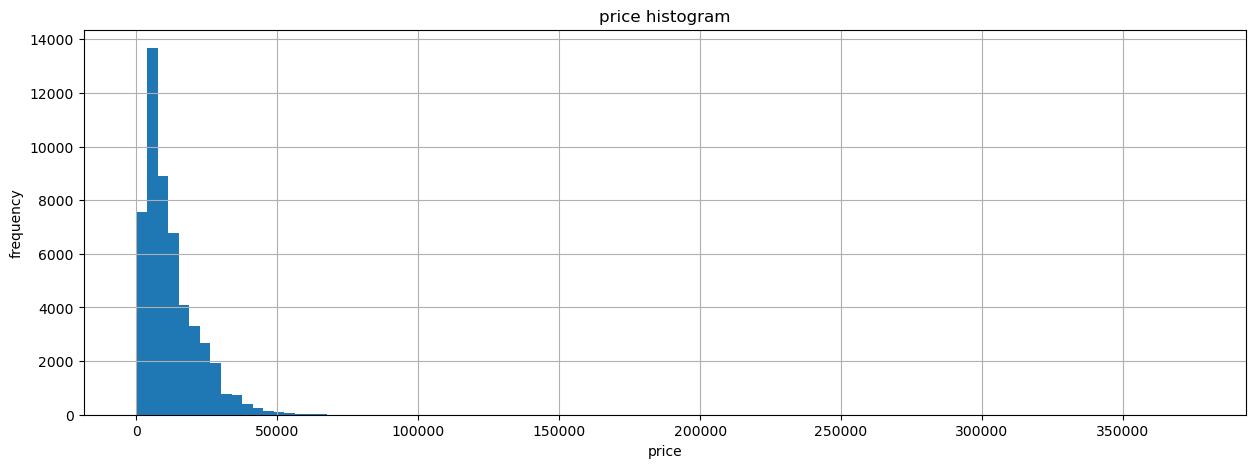

In [88]:
histogram(autos, "price")

Podemos apreciar que existen valores atípicos que alteran la forma del histograma, por un lado sabemos que el mínimo valor de precio que presenta el Dataframe es de 1 y según lo que nos muestra el histograma existe una gran cantidad de filas con valores cercanos a este lo cual no tiene lógica en torno a que estamos observando precios de venta de vehículos, Por otra parte podemos apreciar que el valor máximo de precio es de 375000 siendo la mediana de 9000, es decir el valor máximo de precio es 40 veces la media, esto provoca una desviación estándar muy grande en el mismo y distorsiona su forma

count    51525.000000
mean         8.431033
std          6.157960
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_years, dtype: float64

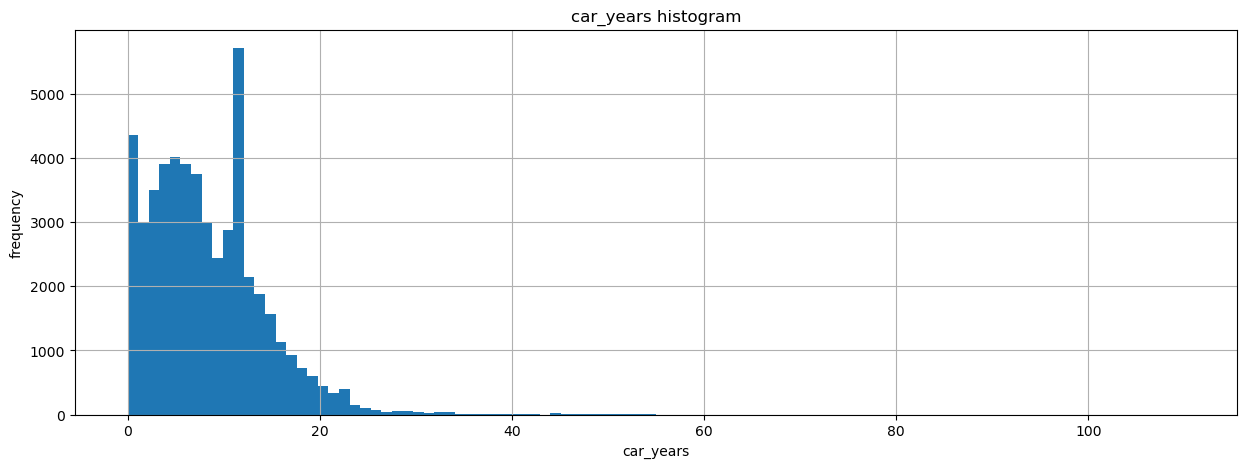

In [89]:
histogram(autos, "car_years")

Al igual que en el caso anterior, podemos observar que el histograma se ve afectado por valores atípicos siendo la mediana de este los 7 años, pero apreciándose valores sobre los 30 años siendo el máximo 110 años, lo cual afecta la forma del histograma aumentando en gran cantidad la desviación estándar. Por otra parte, existe una gran cantidad de valores entorno a los 0 años, aunque en este caso es más factible que se pueda dar esa situación siendo gente que vende vehiculos que compro el mismo año

count     51525.000000
mean     108917.463794
std       66290.602376
min           0.000000
25%       64110.000000
50%      113333.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

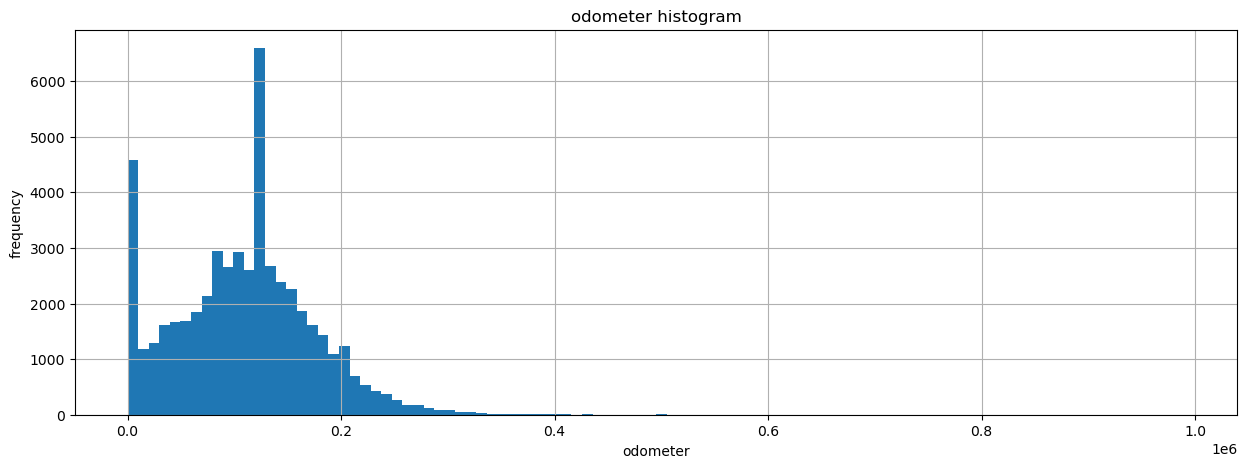

In [90]:
histogram(autos, "odometer")

Nuevamente apreciamos valores atípicos que afectan la legitimidad del histograma mostrado, valores máximos que corresponden a 9 veces la mediana y una gran cantidad de valores mínimos en torno a 0, esto último puede ser factible, pero habría que realizar una comparación con el año del modelo de los vehículos para apreciar la legitimidad de estos datos

count    51525.000000
mean         6.122154
std          1.657435
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

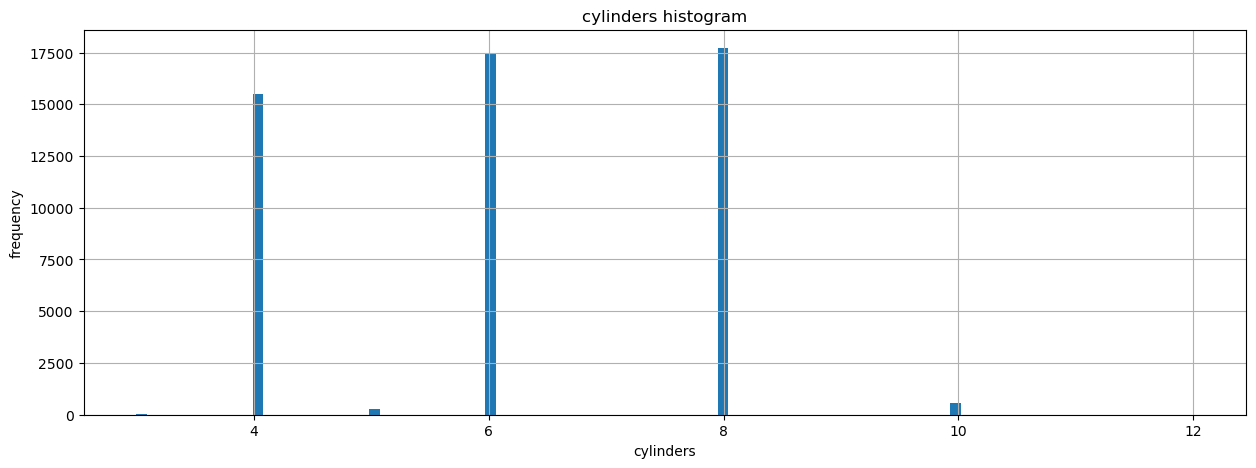

In [91]:
histogram(autos, "cylinders")

En el caso del histograma de "cylinders" aunque se aprecian parámetros con una frecuencia mucho menor que otros no son lo suficientemente distintos como para considerarse valores atípicos, no existe efecto sobre la desviación estándar, el promedio y sobre el histograma en sí mismo

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

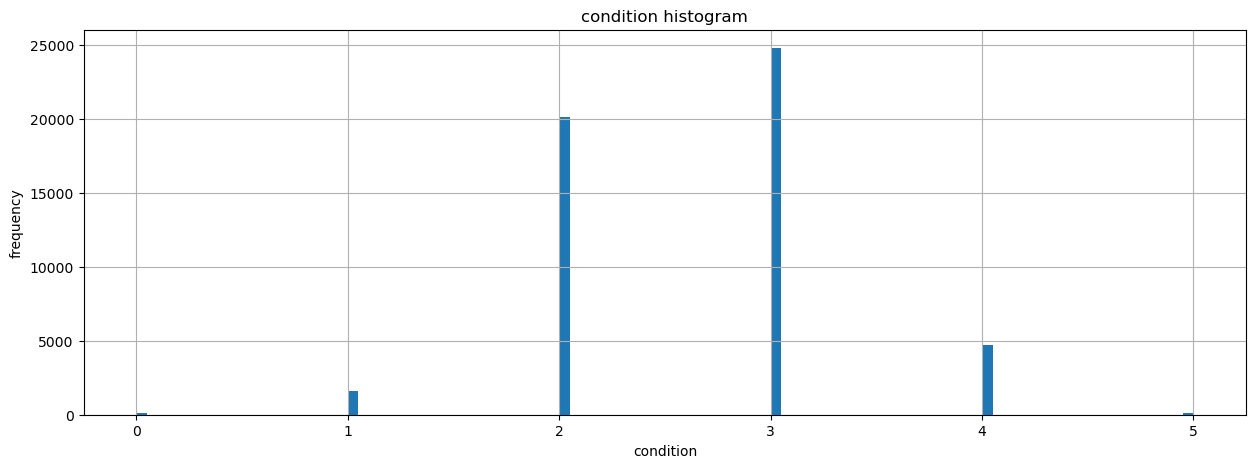

In [92]:
histogram(autos, "condition")

Al igual que en el caos anterior no se aprecian valores atípicos que influyan sobre la legitimidad del histograma, se aprecian parámetros con una frecuencia mucho menor al resto, pero no ejercen influencia sobre la desviación estándar, el promedio o la forma del histograma, además que son valores factibles dentro de la columna de “condition” que se está estudiando

## 9. Estudiar y tratar valores atípicos

En base a los datos recopilados en la sección anterior partiremos definiendo una función para crear un diagrama de caja que nos ayudará a analizar cada columna junto a una segunda función para definir los limites inferiores y superiores para los valores atípicos correspondientes a los "bigotes" superiores e inferiores de los diagramas de caja, posterior a esto se procederá a crear un nuevo Dataframe sin estos valores

In [93]:
def diagcaja(data, columna, liminf, limsup):
    data.boxplot(column=columna, figsize=(15,5))
    plt.ylabel("frequency")
    plt.title(f"{columna} box plot")
    plt.ylim(liminf,limsup)

In [94]:
def limites(datos):
    q1 = datos.quantile(.25)
    q3 = datos.quantile(.75)
    IQR = q3 - q1
    lim_sup = q3 + (IQR * 1.5)
    lim_inf = q1 - (IQR * 1.5)
    return lim_sup, lim_inf

### 9.1. "Price"

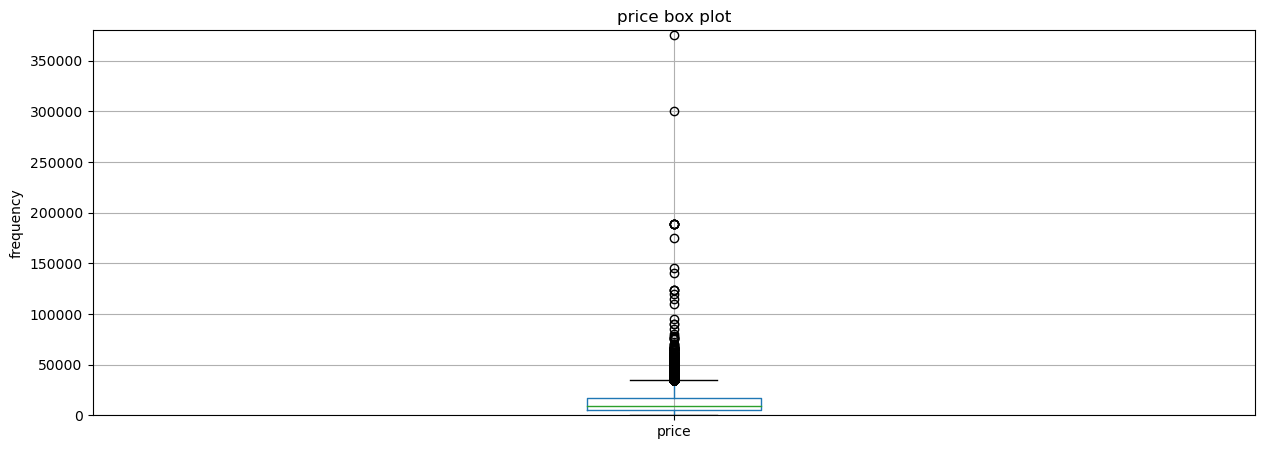

In [95]:
diagcaja(autos, "price", 0, 380000)

In [96]:
limites(autos["price"])

(34597.5, -12758.5)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

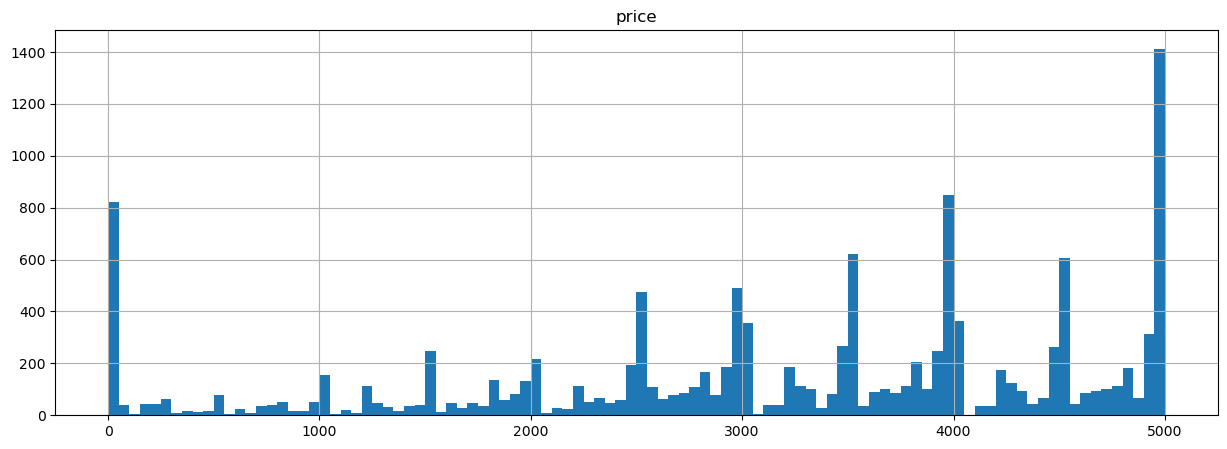

In [97]:
autos.hist(column="price", bins=100, range=(0,5000), figsize=(15,5))

Con respecto al límite superior de la columna "price" la función anteriormente definida nos marca este valor como 34597.5 el cual será redondeado a 34598.

En el caso del límite inferior todos los valores se encuentran dentro del diagrama de caja pero observando un histograma de "price" con un rango acotado de 0 a 5000, observamos que el precio va disminuyendo con una tendencia normal existiendo los peak de precios en valores "cerrados" como 1000, 1500, 2000, etc, pero al acercarnos a cero se nos muestra otro peak entorno al valor de 1, podemos suponer que estos son precios falsos puestos por el vendedor para que los contacten y entregar de forma directa el precio real del vehículo, es por esto que para mantener la tendencia que posee histograma y para eliminar estos precios "falsos" se establera el limite inferior a los 500 dólares

### 9.2. "Car_years"

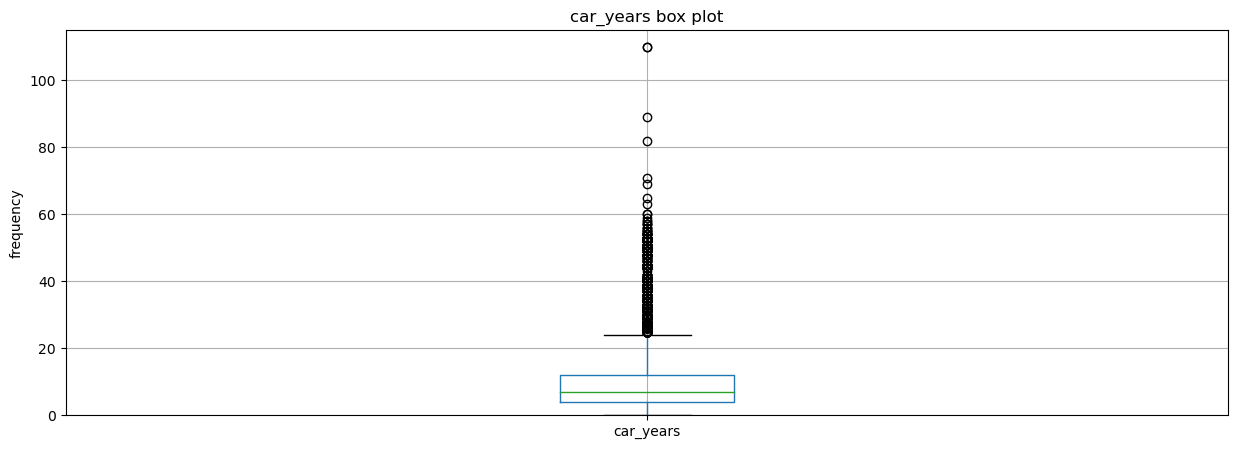

In [98]:
diagcaja(autos, "car_years", 0, 115)

In [99]:
limites(autos["car_years"])

(24.0, -8.0)

Con respecto al límite superior en "car_years" se establecerá este en los 24 años, tal como define nuestra función limites.

En el caso del límite inferior, todos los valores se encuentran dentro de los bigotes del diagrama de caja y no es anormal que existan vehículos del mismo año en el que fueron publicados a la venta por lo que no se cortara un límite inferior.

### 9.3. "Odometer"

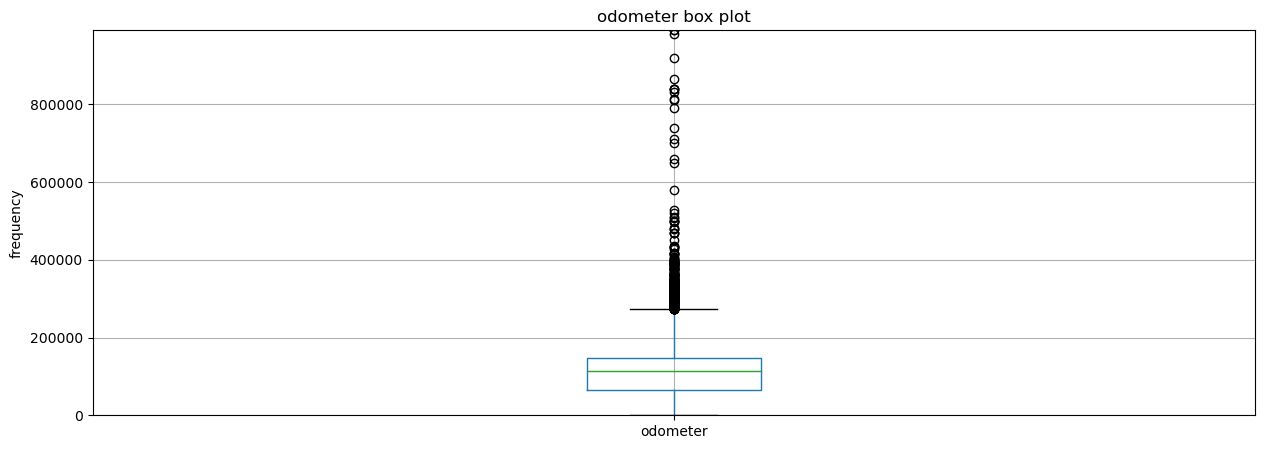

In [100]:
diagcaja(autos, "odometer", 0, 990000)

In [101]:
limites(autos["odometer"])

(273387.5, -61456.5)

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

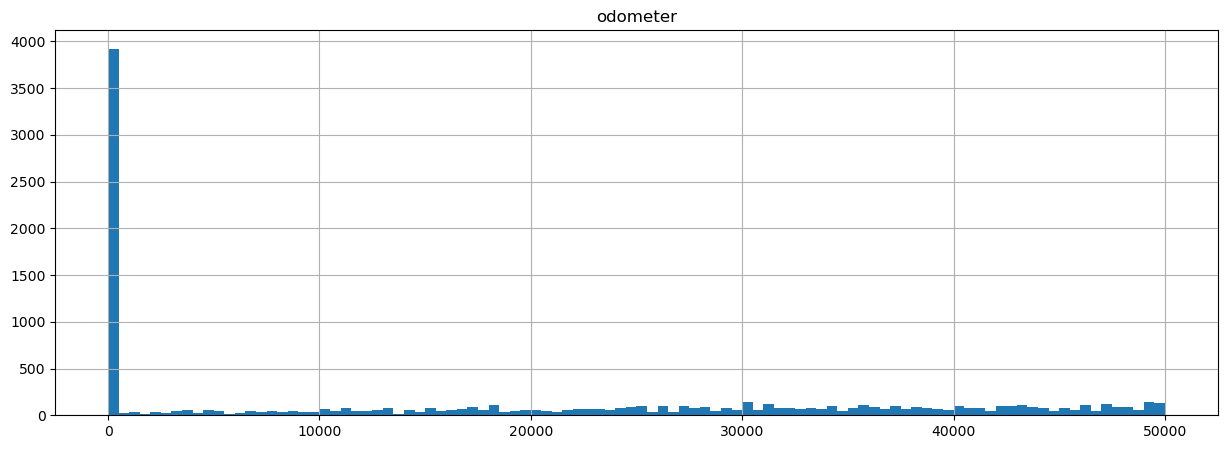

In [102]:
autos.hist(column="odometer", bins=100, range=(0,50000), figsize=(15,5))

array([[<AxesSubplot:title={'center':'car_years'}>]], dtype=object)

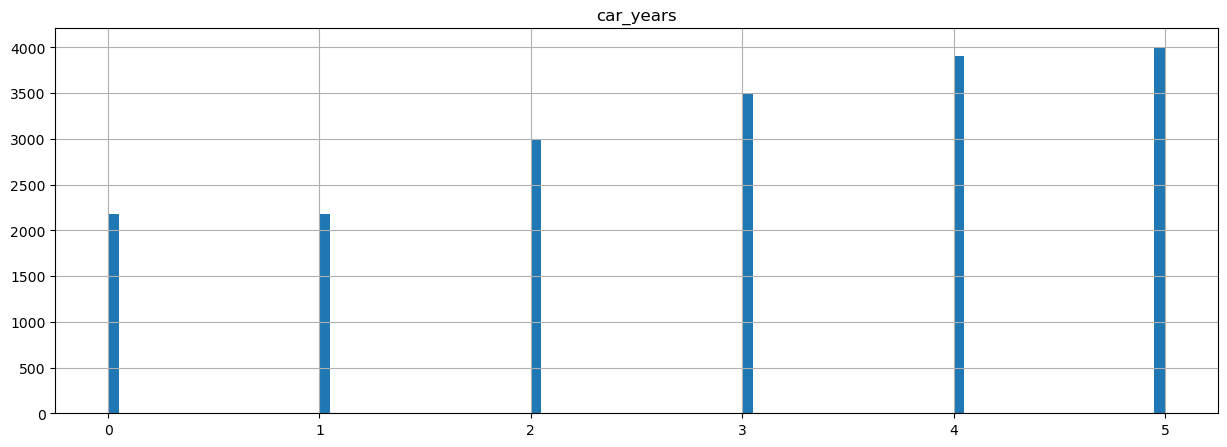

In [103]:
autos.hist(column="car_years", bins=100, range=(0,5), figsize=(15,5))

Para el caos del límite superior de "odometer", al igual que en casos anteriores definiremos nuestro limite superior en el limite otorgado por nuestra funcion "limites" que corresponde al bigote superior de nuestro diagrama de caja, en este caso aproximandolo a 273388.

Para el caso del límite inferior, nuevamente todos los valores se encuentran dentro del bigote inferior del diagrama de caja, pero hay que analizar el hecho indicado con anterioridad en el proyecto que existe una gran cantidad de valores iguales a 0 en esta columna. Observando un histograma con un rango de 0 a 50000 podemos observar un peak de alrededor de 3900 valores iguales a 0, lo anterior puede ser factible suponiendo que son vehículos comprados recientemente que no han tenido uso, para comprobar lo anterior observamos un histograma de "car_years" con un rango de 0 a 5 años, aquí notamos que hay alrededor de 2200 vehículos con 0 años y 2200 con 1 año a la venta por lo que nuestra suposición inicial se vuelve difícil de comprobar ya que prácticamente todos los vehículos con 0 y 1 años deberían ser 0 kilometros, debido a esto es que realizaremos un corte en los valores de "odometer" de 0.

### 9.4. "Cylinders"

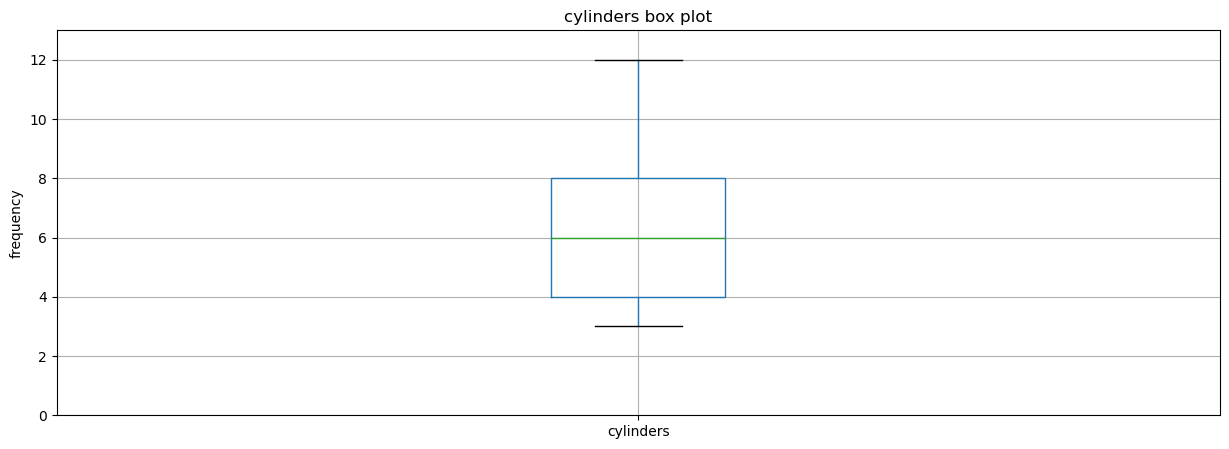

In [104]:
diagcaja(autos, "cylinders", 0, 13)

In [105]:
limites(autos["cylinders"])

(14.0, -2.0)

Como se mencionó en la sección anterior, no se aprecian valores anómalos en esta columna

### 9.5. "Condition"

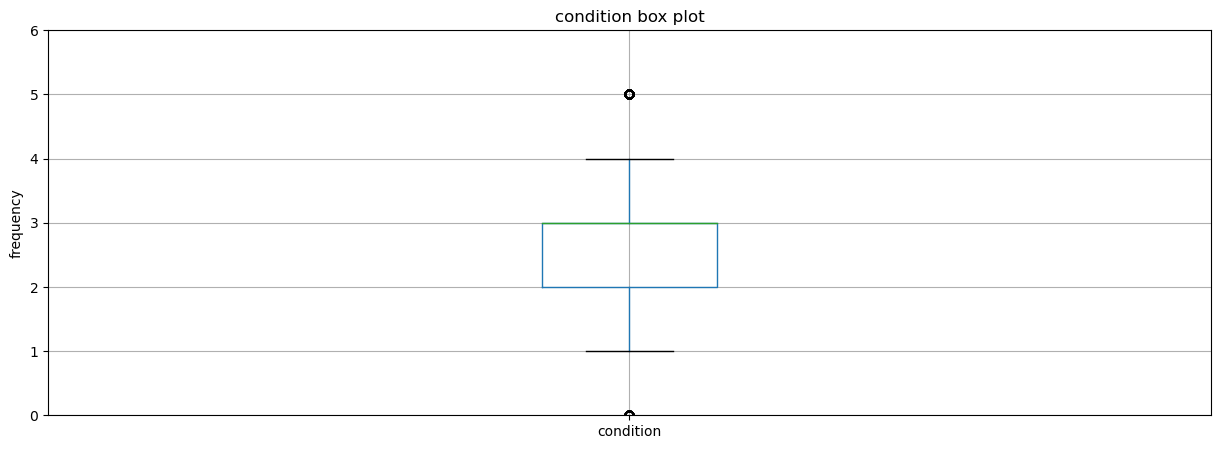

In [106]:
diagcaja(autos, "condition", 0, 6)

In [107]:
limites(autos["condition"])

(4.5, 0.5)

Podemos observar en el diagrama de caja la presencia de valores que se podrían considerar anómalos, pero a su vez al redondear los valores de limites superior e inferior entregados por nuestra función estos pasan a quedar dentro de nuestros límites a definir, por esto como definimos en la sección anterior no se realizaran cortes en ambos límites.

### 9.6. Dataframe filtrado

In [108]:
autos_filtrado = autos.query('500 <= price <= 34598 & car_years <= 24 & 0 < odometer <= 273388')
autos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44366 entries, 0 to 51523
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              44366 non-null  int64         
 1   model_year         44366 non-null  int32         
 2   model              44366 non-null  object        
 3   condition          44366 non-null  int64         
 4   cylinders          44366 non-null  int32         
 5   fuel               44366 non-null  object        
 6   odometer           44366 non-null  float64       
 7   transmission       44366 non-null  object        
 8   type               44366 non-null  object        
 9   paint_color        44366 non-null  object        
 10  is_4wd             44366 non-null  int32         
 11  date_posted        44366 non-null  datetime64[ns]
 12  days_listed        44366 non-null  int64         
 13  weekday_posted     44366 non-null  int64         
 14  month_

## 10. Estudiar parámetros principales sin valores atípicos

Procederemos a comparar los histogramas con el Dataframe original versus el Dataframe filtrado y sacaremos conclusiones de cada caso.

### 10.1 Comparación "Price"

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

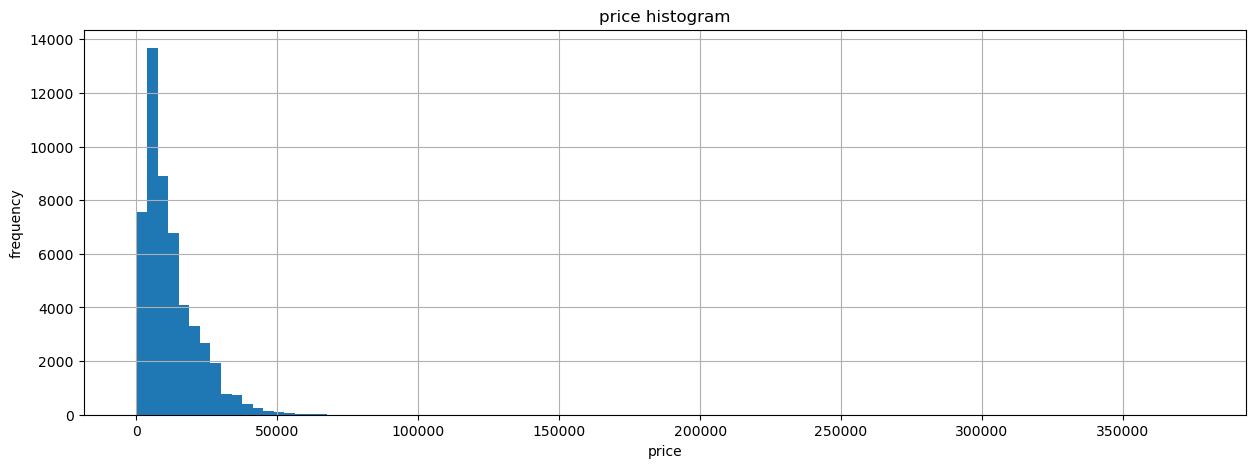

In [109]:
histogram(autos, "price")

count    44366.000000
mean     11532.022810
std       7735.572712
min        500.000000
25%       5495.000000
50%       9450.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64

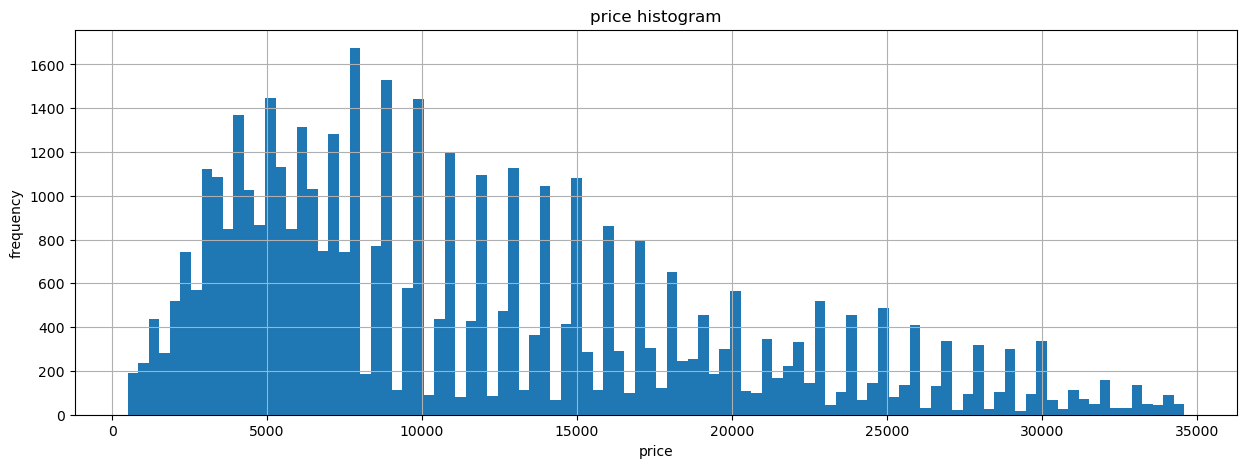

In [110]:
histogram(autos_filtrado, "price")

Al comparar ambos histogramas podemos apreciar que el que posee los valores filtrados nos muestra un claro tipo de tendencia teniendo su moda alrededor de los 8000 y disminuyendo hacia ambos sentidos del histograma, tambien se pueden notar peaks en valores de mil en mil, esto se explica por que la gente prefiere publicar un valor "cerrado" como precio de venta.   

### 10.2. Comparación "car_years"

count    51525.000000
mean         8.431033
std          6.157960
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_years, dtype: float64

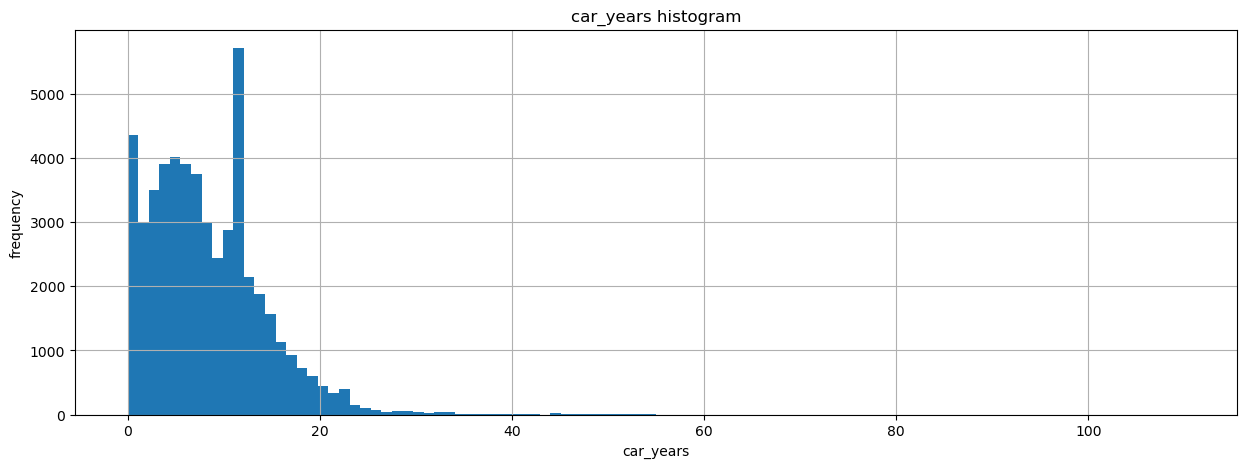

In [111]:
histogram(autos, "car_years")

count    44366.000000
mean         8.214962
std          5.060230
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         24.000000
Name: car_years, dtype: float64

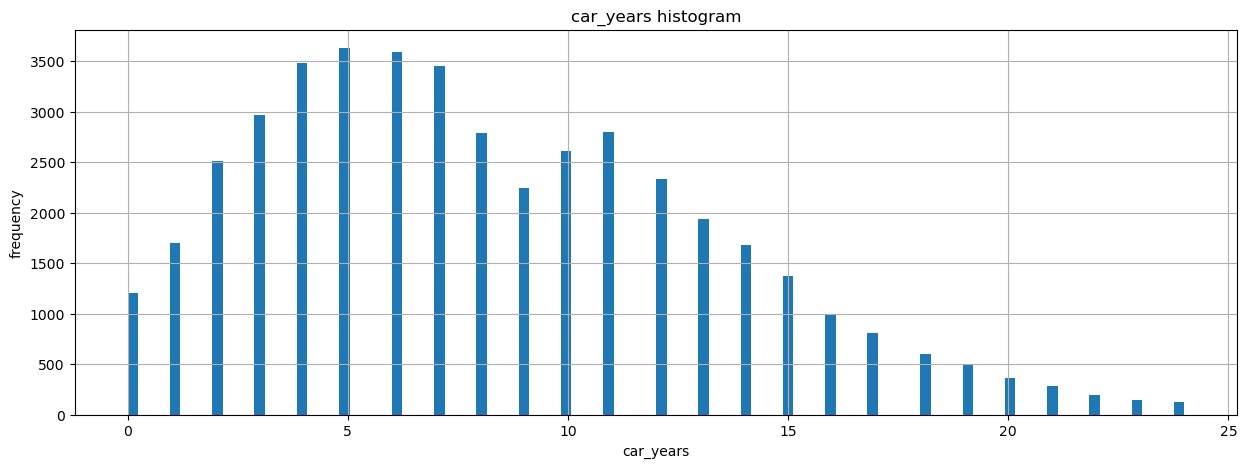

In [112]:
histogram(autos_filtrado, "car_years")

Al comparar ambos gráficos podemos notar que en el dataframe filtrado desaparece un peak existente en el dataframe original alrededor de los 10 años, el cual pudo darse debido a la acumulación de datos entorno a esos años. Por otra parte, con el dataframe filtrado podemos notar una clara tendencia creciente hasta los 5-6 años como peak para después descender hasta los 9 años, volver a crecer hasta los 11 años como nuevo peak y finalmente descender.

### 10.3. Comparación "odometer"

count     51525.000000
mean     108917.463794
std       66290.602376
min           0.000000
25%       64110.000000
50%      113333.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

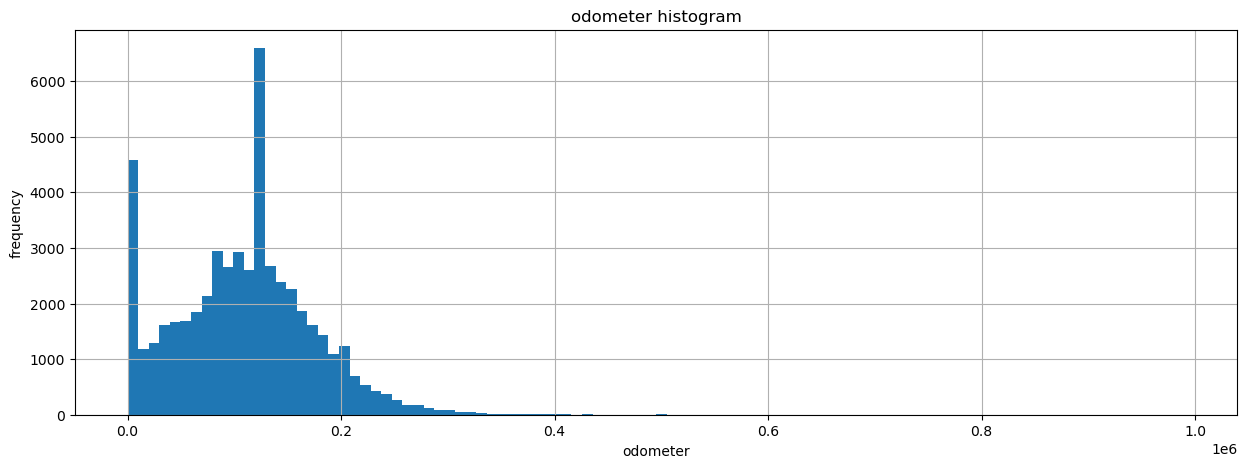

In [113]:
histogram(autos, "odometer")

count     44366.000000
mean     116931.506807
std       54972.417504
min           1.000000
25%       81397.750000
50%      120000.000000
75%      151300.000000
max      273335.000000
Name: odometer, dtype: float64

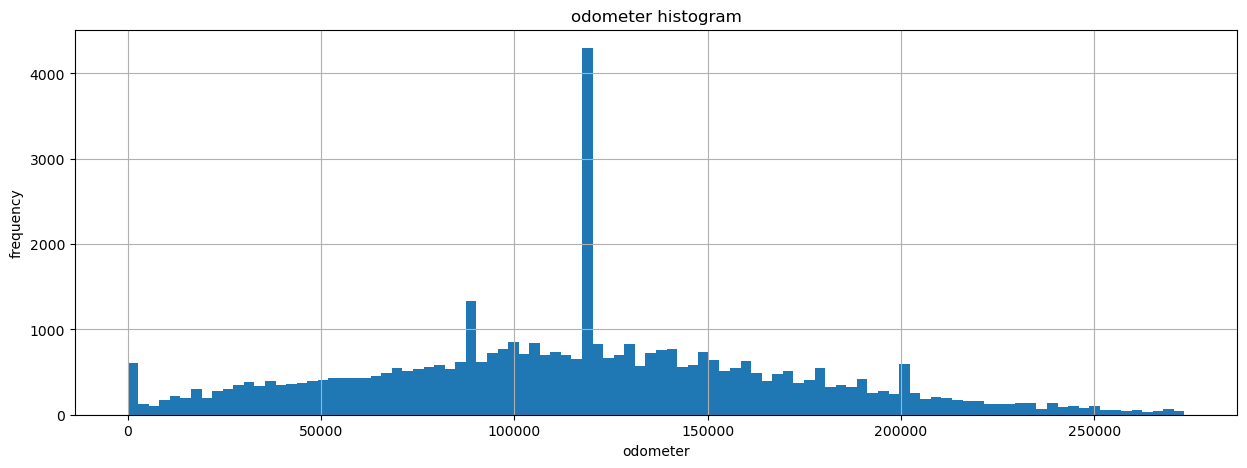

In [114]:
histogram(autos_filtrado, "odometer")

En el histograma filtrado disminuye notablemente el peak de valores en torno a 0 y notamos una distribución con una tendencia normal pero que tiene un peak de valores mucho mayor al resto, alrededor de los 120000, esto se puede explicar al por la modificación de los valores ausentes ya que el valor que más varió, alrededor de un 7%, de los datos fue el de 120000.

### 10.4. Comparación "cylinders" y "condition"

Para el caso de "cylinders" y "condition" al no haberse eliminado valores definiendo limites superiores o inferiores no hay variaciones con respecto a las impresiones obtenidas en el primer análisis.

## 11. Periodo de colocación de los anuncios

Procederemos a estudiar el periodo de colocación de los anuncios, determinaremos la media y la mediana del mismo y procederemos a determinar la vida útil de los mismos además de cuando son publicados por un corto o largo tiempo.

count    44366.000000
mean        39.548393
std         28.179019
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

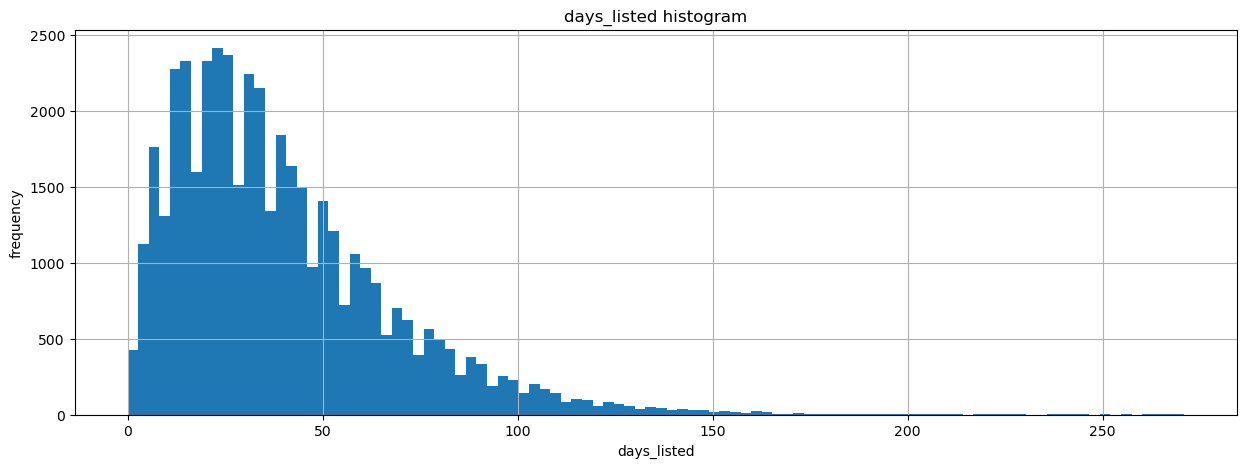

In [115]:
histogram(autos_filtrado, "days_listed")

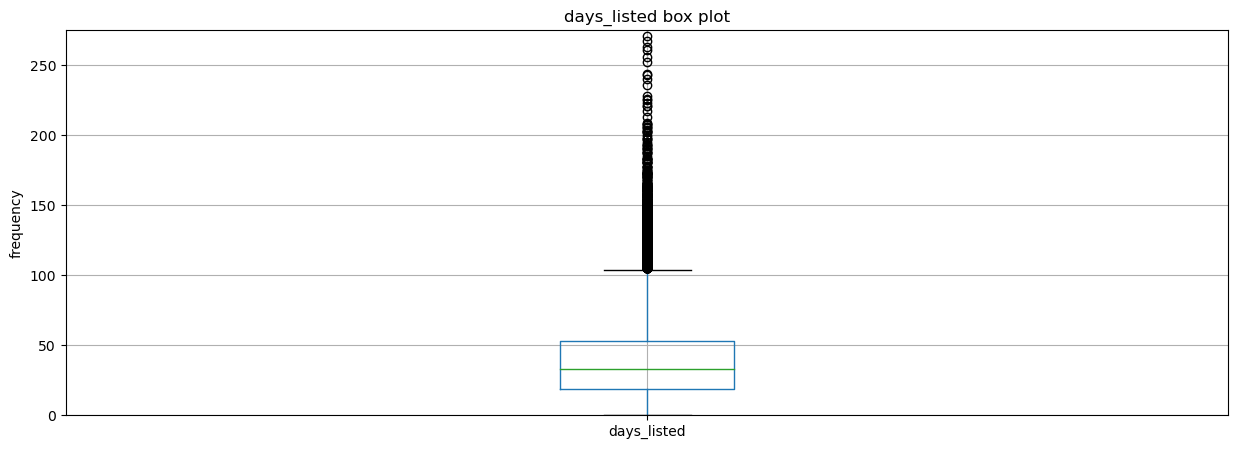

In [116]:
diagcaja(autos_filtrado, "days_listed", 0, 275)

In [117]:
limites(autos["days_listed"])

(104.0, -32.0)

Utilizando las funciones anteriormente creadas podemos definir que los anuncios anormalmente largos son los superiores a 104 días, mientras que no encontramos valores que correspondan a anuncios que se borraron demasiado rápido, en base a lo anterior podríamos definir el periodo de vida útil de los anuncions entre los 0 y 104 días.

## 12. Precio promedio por cada tipo de vehículo

Para poder realizar el análisis final de los factores de precio procederemos a analizar el número de anuncios y el precio promedio para cada tipo de vehículo para finalmente seleccionar los tipos de vehículos que posean la mayor cantidad de anuncios como representativos del resto.

In [118]:
price_model = autos_filtrado.pivot_table(index="type", values="price", aggfunc=["mean", "count"])
price_model.columns = ["mean", "count"]
price_model.sort_values(by="count", ascending=False)

,mean,count
type,,
sedan,7207.683586,11033
SUV,10820.957863,10988
truck,15666.258684,10047
pickup,15098.819080,5870
coupe,13840.160134,1786
wagon,9219.223443,1365
mini-van,8182.661454,1087
hatchback,7004.549206,945
van,9294.506903,507


<AxesSubplot:xlabel='type'>

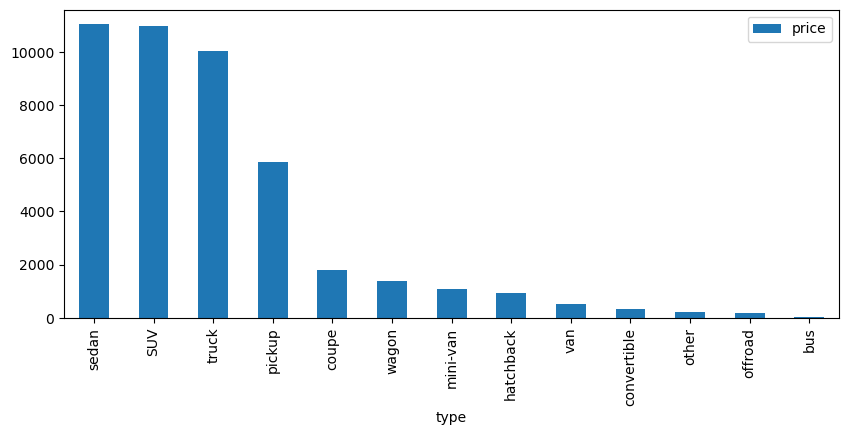

In [122]:
count_type = autos_filtrado.pivot_table(index="type", values="price", aggfunc="count").sort_values(by="price", ascending=False)
count_type.plot(kind="bar", figsize=(10, 4))

En base a los resultados obtenidos, los tipos de vehiculos seleccionados para continuar con el análisis serán sedan y SUV.

## 13. Factores de precio

Procederemos a analizar qué factores impactan más en el precio de venta tomando los dos tipos más populares definidos en la sección anterior, se analizará la correlación entre los distintos parámetros y el precio de los vehículos.

### 13.1. Sedan

In [123]:
sedan = autos_filtrado[autos_filtrado["type"] == "sedan"]

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='car_years', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='car_years', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='car_years'>,
        <AxesSubplot:xlabel='odometer', ylabel='car_years'>,
        <AxesSubplot:xlabel='car_years', ylabel='car_years'>,
        <AxesSubplot:xlabel='condition', ylabel='car_years'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='car_years', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>]],
      dtype=object)

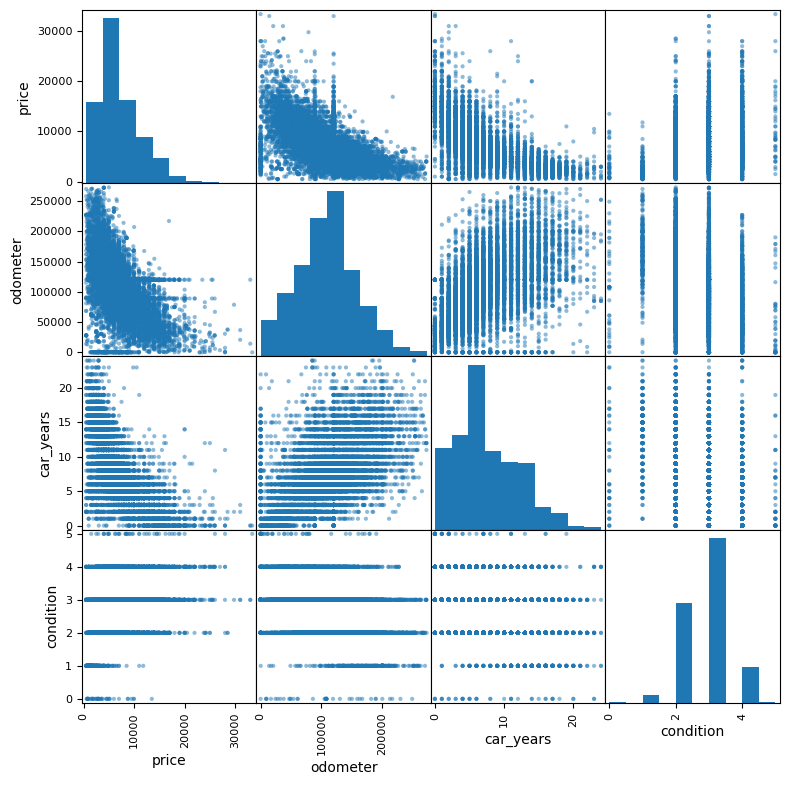

In [124]:
sedan_parameters = sedan[["price", "odometer", "car_years", "condition"]]
pd.plotting.scatter_matrix(sedan_parameters, figsize=(9, 9)) 

In [125]:
sedan_parameters.corr()

,price,odometer,car_years,condition
price,1.000000,-0.588927,-0.672131,0.322082
odometer,-0.588927,1.000000,0.543100,-0.331250
car_years,-0.672131,0.543100,1.000000,-0.286713
condition,0.322082,-0.331250,-0.286713,1.000000


En el caso de los sedan podemos apreciar que los 3 parámetros "odometer", "car_years" y "condition" muestran una relación con el precio de venta del vehículo, en el caso de "odometer" y "car_years" es inversamente proporcional al precio lo que es lógico ya que un vehículo con menos antigüedad o menor millaje aumenta su precio versus uno más "usado", por el lado de "condition" es directamente proporcional ya que definimos el id de la condición como que entre más alto el valor en mejor estado se encuentra el vehículo. Finalmente podemos concluir que de estos tres parámetros el que mayor correlación tiene con el precio de venta del vehículo es "car_years", es decir entre más nuevo es el auto mayor es su precio.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

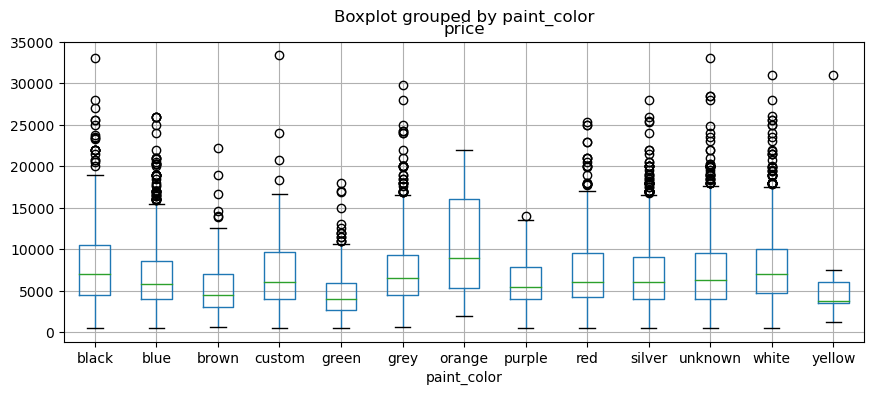

In [129]:
sedan.boxplot(column="price", by="paint_color", figsize=(10,4))

In [130]:
sedan.pivot_table(index="paint_color", values="price", aggfunc="count")

,price
paint_color,
black,1585
blue,1133
brown,243
custom,238
green,184
grey,1496
orange,9
purple,23
red,842


En el caso de "paint color" tenemos algunos colores no poseen una cantidad suficiente de registros como para considerarlos en el análisis, tales como el amarillo, naranja y el morado. Considerando el resto, podemos observar que en general todos los colores se observan con una tendencia más o menos pareja, algunos colores tienen un menor precio general que el resto, como el café, pero ninguno destaca de sobremanera con respecto a los demás.

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

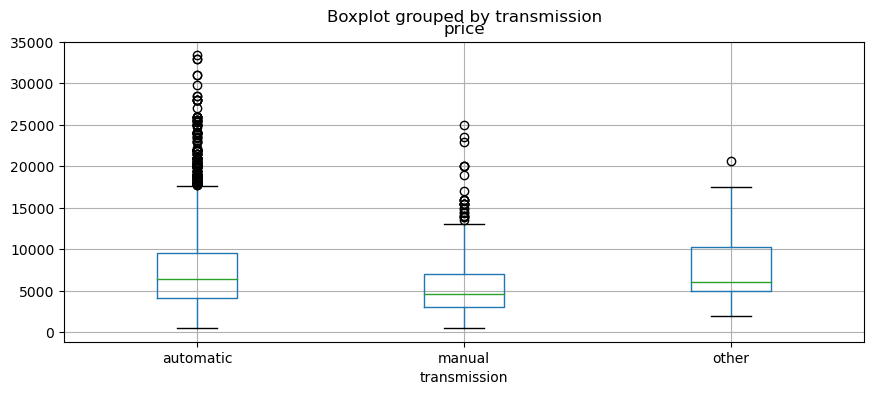

In [131]:
sedan.boxplot(column="price", by="transmission", figsize=(10,4))

In [132]:
sedan.pivot_table(index="transmission", values="price", aggfunc="count")

,price
transmission,
automatic,10434
manual,534
other,65


En el caso de "transmission" podemos observar que automatic y other tienen un percentil 50 y 75 similares, mientras que manual posee percentiles notablemente menores que las otras dos categorías.

### 13.2. SUV

In [133]:
suv = autos_filtrado[autos_filtrado["type"] == "SUV"]

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='car_years', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='car_years', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='car_years'>,
        <AxesSubplot:xlabel='odometer', ylabel='car_years'>,
        <AxesSubplot:xlabel='car_years', ylabel='car_years'>,
        <AxesSubplot:xlabel='condition', ylabel='car_years'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='car_years', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>]],
      dtype=object)

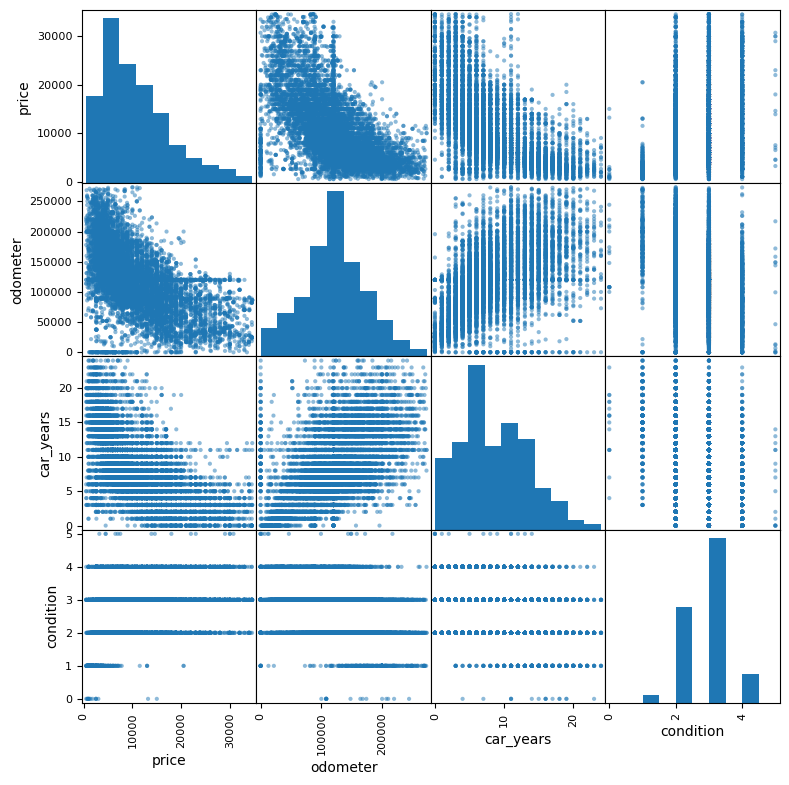

In [134]:
suv_parameters = suv[["price", "odometer", "car_years", "condition"]]
pd.plotting.scatter_matrix(suv_parameters, figsize=(9, 9)) 

In [135]:
suv_parameters.corr()

,price,odometer,car_years,condition
price,1.000000,-0.584661,-0.643819,0.295276
odometer,-0.584661,1.000000,0.556415,-0.331961
car_years,-0.643819,0.556415,1.000000,-0.296632
condition,0.295276,-0.331961,-0.296632,1.000000


Para el caso del modelo SUV se cumplen las mismas relaciones que para el sedan, la relación de "odometer" y "car_years" es inversamente proporcional y la de "condition" es directamente proporcional, también se puede observar que las correlaciones en general se mantienen en ambos tipos de vehículos, manteniéndose el parámetro "car_years" como el con mayor correlación.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

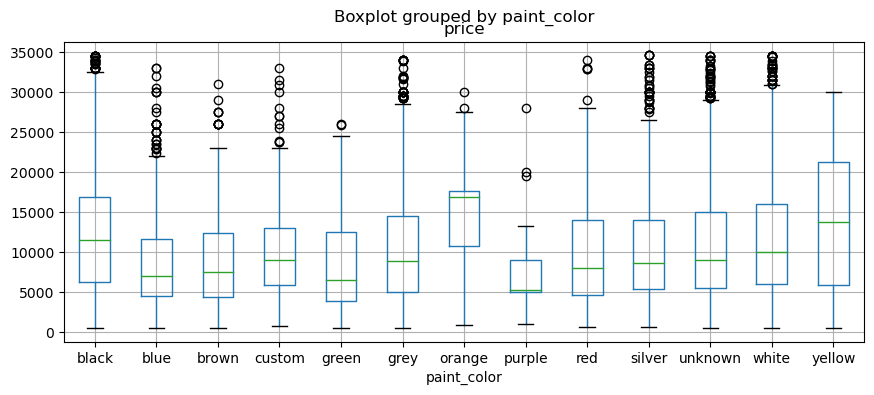

In [136]:
suv.boxplot(column="price", by="paint_color", figsize=(10,4))

In [137]:
suv.pivot_table(index="paint_color", values="price", aggfunc="count")

,price
paint_color,
black,1903
blue,936
brown,334
custom,246
green,392
grey,1072
orange,80
purple,36
red,814


Para el caso del color volvemos a tener colores que quedan fuera del análisis por falta de representación, en este caso los colores amarillo y morado. Entre los colores que si se pueden analizar observamos con mayor percentil 50 y 75 al color naranjo, seguido del negro y estando el resto de los colores en una tendencia similar. Con esto podemos concluir que el factor de color no tiene una mayor correlación ya que no se puede apreciar una mayor correlación estre los dos tipos de vehículos.

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

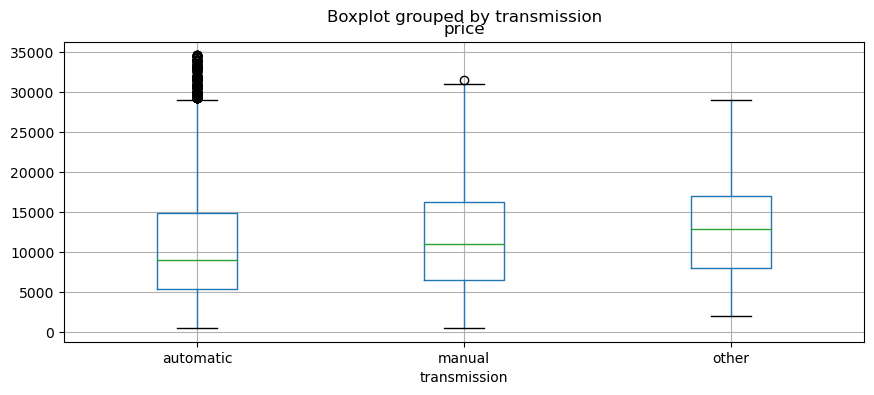

In [138]:
suv.boxplot(column="price", by="transmission", figsize=(10,4))

In [139]:
suv.pivot_table(index="transmission", values="price", aggfunc="count")

,price
transmission,
automatic,10461
manual,439
other,88


en el caso de la transmission, other se presenta como el parámetro con mayores percentiles con respecto al resto, mientras que automatic a diferencia de en el modelo sedan es el que más abajo se encuentra.

## 14. Conclusión general

Partiendo por el procesamiento de datos, teníamos un dataframe con datos faltantes, duplicados implícitos, y problemas con el tipo de datos. Se comenzó analizando cada columna y arreglando los problemas de formato que pudieran existir, incluyendo la eliminación de los duplicados implícitos.

Para los casos de valores ausentes, se concluyó que para el caso específico de la columna “is_4wd” estos se debían a un problema técnico durante el ingreso de los datos ya que los faltantes correspondían a alrededor del 50% de los datos y a pesar de ser una variable booleana solo tenía un tipo de dato, por lo que se procedió a llenar los datos faltantes con el otro valor booleano. Para las columnas “model_year” y “cylinders” se procedió a iterar los datos con respecto a la columna con datos completos que mayor relación pudiera tener con ellas, para el primer caso el modelo del auto y para el segundo el modelo en conjunto con el tipo. Para el caso de “paint_color” no se encontró otra columna que pudiera relacionarse directamente con este parámetro por lo que al ser de tipo categórico se procedió a llenar los datos con el valor “unknown” y en el caso de “odometer” al ser una variable importante para el análisis de los datos y ser la única columna que podría relacionarse con ellos “model_year” la cual ya habíamos intervenido anteriormente, se tuvo que completar con otra columna que no hubiera sido intervenida, en este caso condition debido a la relación de que entre en mejor condición se encuentre el auto puede que este se haya utilizado menos.

Posteriormente se procedió a cambiar el tipo de ciertas columnas por tipos que facilitaran el posterior análisis de esta, pasar fechas a “date” y números a “int”.

El siguiente paso fue enriquecer el dataframe con columnas extras que pudieran ayudar durante el análisis posterior de los datos, tales como días, meses y años correspondientes a la publicación del anuncio, la edad del auto o el millaje por año.

Pasamos a estudiar la existencia de valores atípicos en ciertas columnas, encontrándose estos en “price”, “car_years” y “odometer”, en el caso de “cylinders” y “condition” no se encontraron o se decidió que estos afectaban en muy baja medida el dataframe ya sea porque su frecuencia era muy pequeña y además no se distanciaban tanto del resto de los valores por lo que no se eliminaron. Para el caso de las primeras 3 columnas todas poseían valores atípicos “superiores” por lo que se decidió eliminar los que estuvieran por sobre el bigote superior de los diagramas de caja creados para cada columna, en el caso de los inferiores, las columnas que se vieron delimitadas en sus valores inferiores fueron “price” y "odometer", ya que poseían valores que no eran lógicos, específicamente para la primera precios de 1 para la venta de un vehículo, por lo que concluyendo la teoría de que son precios falsos puestos por el cliente para entregar el precio real de forma directa con el comprador se procedió a eliminar estos valores, mientras que para odometer existía una gran cantidad de valores de 0 pero al compararlos con la cantidad de vehículos con una vida de 0 años, la proporción no coincidía siendo mucho mayor la de vehículos con "odometer" 0 por lo que se decidio eliminar estos valores.

Continuamos definiendo el periodo de colocación normal de los anuncios, cuando estos son demasiado largos y cuando se eliminaban demasiado pronto, esto a través del uso de un histograma y un diagrama de caja, concluyendo el periodo de vida útil entre los 0 y 104 días, definimos los avisos demasiado largos por sobre los 104 días y no se determinaron que hubieran eliminados demasiado pronto.

Después se procedió a identificar los dos tipos de vehículos con mayor cantidad de avisos para poder realizar el análisis final del proyecto, estos resultaron ser sedan y SUV.

Finalmente se realizó el análisis objetivo del proyecto para concluir que factores impactan en mayor medida el precio de los vehículos a través de diagramas de correlación para las columnas cuantitativas y diagramas de caja para las categóricas, las conclusiones de eso son:

1-	Para los parámetros de “odometer”, “car_years” y “condition” se puede apreciar la existencia de una correlación con respecto al precio, los dos primeros de carácter inversamente proporcional ya que a menor millaje o menos años tenga el vehículo mayor será el precio de este y en el caso de “condition” es de carácter directamente proporcional ya que se transformó este parámetro anteriormente a un carácter numérico en el que a mayor valor mejor estado se encuentra el vehículo.

2-	De los tres parámetros antes mencionados en el análisis realizado, en los dos tipos de vehículo, “car_years” fue el que obtuvo una mayor correlación teniendo un valor prácticamente idéntico en ambos modelos, con una diferencia de un 3% entre ambas, por lo que podemos concluir que este es el parámetro que más afecta el valor del vehículo de manera consistente entre los distintos modelos.

3- Para los parámetros categóricos “paint_color” y “transmission”, en el primero no se pudo confirmar una correlación con el precio de venta del vehículo, en general no se observa un color que destaque en precio por sobre los demás como para poder identificarlo como un parámetro que afecte realmente el precio o en el caso del color naranja para el SUV que si destaca por sobre los demás no tenemos una cantidad de muestra para corroborarlos con los autos de tipo sedan. Para el caso de “transmission” podemos observar que en ambos tipos de vehículos destaca un poco la transmisión "other" pero tampoco en una cantidad que pueda identificarse como claramente superior al resto, mientras que los tipos de trasmisión "automatic" y "manual" se invierten en precios dependiendo del tipo de vehículo. En resumen, no podemos concluir que estos dos parámetros tengan una correlación clara con el precio de los vehículos.

Finalmente, también es de consideración mencionar que uno de los mayores problemas durante el desarrollo del análisis gira entorno a los valores ausentes y las razones de porque existen, la mayor solución a este problema sería contactar directamente a la fuente proveedora de los datos para obtener mayor información acerca de la existencia de los mismos y poder obtener conclusiones más fidedignas para poder reemplazarlos.
